In [3]:
%pylab inline
import glob
import fitsne
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from skimage.color import rgb2gray
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [19]:
train_df = pd.read_table('/Z/personal-folders/interns/saket/github/pywsi/data/patch_df/train_df_segmented_with_labels.tsv')
train_df = train_df.dropna()
validation_df = pd.read_table('/Z/personal-folders/interns/saket/github/pywsi/data/patch_df/validate_df_segmented_with_labels.tsv')
validation_df = validation_df.dropna()

                         

In [20]:
label = train_df['is_tumor'].astype('int32')
train_df_features = train_df.drop(columns='is_tumor')
matrix = train_df_features.values
matrix.shape


(532260, 46)

In [21]:
embedding = umap.UMAP(n_neighbors=20,
                      min_dist=0.3,
                      metric='correlation').fit_transform(matrix)

Text(0.5,1,'UMAP')

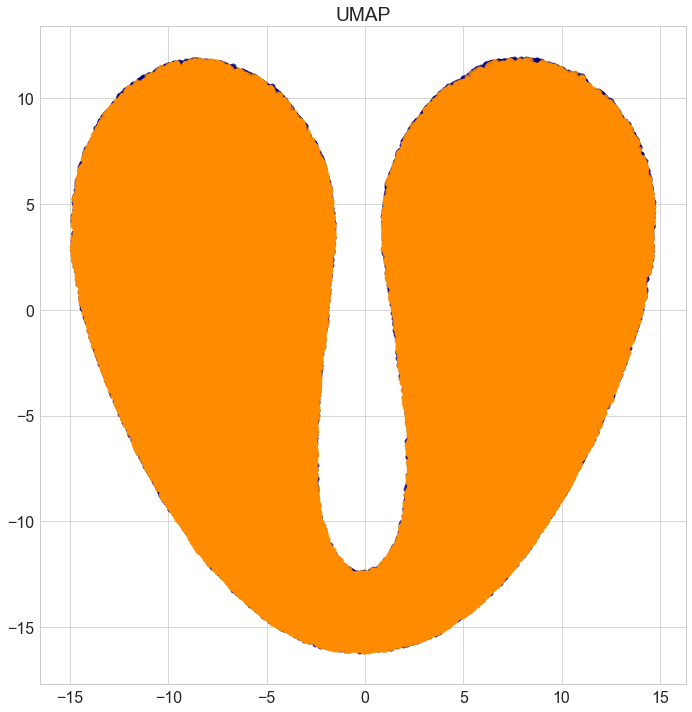

In [23]:
fig = plt.figure(figsize=(10, 10))
colors = ['navy', 'darkorange']
lw = 0.2
label_matrix = ['normal', 'tumor']

for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(embedding[label == i, 0], embedding[label == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
fig.tight_layout()
plt.title('UMAP')

In [26]:
Y = fitsne.FItSNE(matrix.copy(order='C'), max_iter=500)

Text(0.5,1,'FIt-SNE')

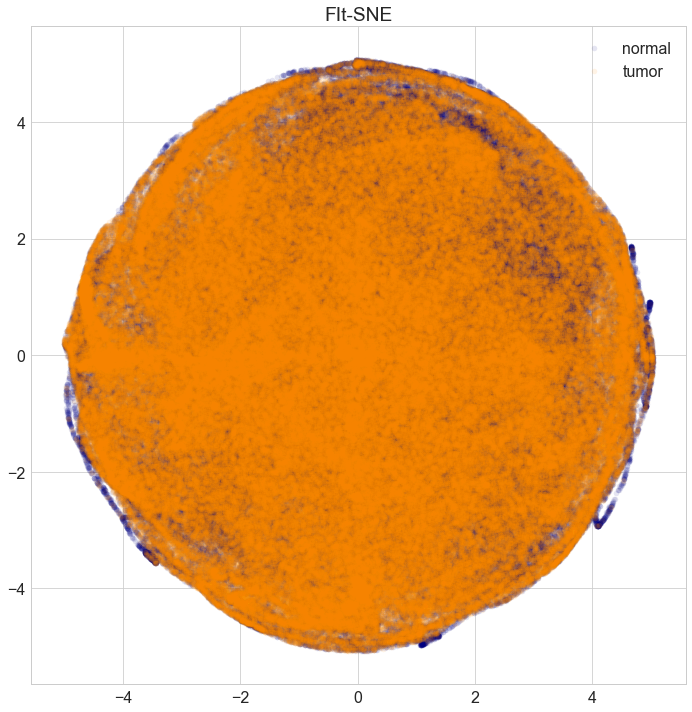

In [29]:
fig = plt.figure(figsize=(10, 10))
for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(Y[label == i, 0], Y[label == i, 1], color=color, alpha=.1, lw=0.01,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

fig.tight_layout()
plt.title('FIt-SNE')